# Análisis exploratorio de datos

Ahora vamos a explorar un dataset para obtener información y crear un mejor sentido de comprensión sobre el mismo. 

En internet, podemos encontrar muchos datasets gratuitos para descargar en formato csv. Por ejemplo:

- Datos abiertos de Argentina: https://datos.gob.ar/
- Google: https://datasetsearch.research.google.com/

En este caso, vamos a explorar un dataset que contiene datos sobre precios de casas en sidney. Lo descargamos de https://www.kaggle.com/mihirhalai/sydney-house-prices

**Usamos SydneyHousePrices.csv**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Copia de SydneyHousePrices.csv')

Empecemos a explorar. Lo primero es saber con que datos contamos y que significan cada una de las columnas

In [4]:
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2.0,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3.0,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3.0,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1.0,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4.0,4.0,house


Las columnas que tenemos son:

- Id: es simplemente un valor numérico que identifica a la propiedad. No nos es útil para el análisis (la podemos descartar).
- Date: Fecha de publicación
- suburb: suburbio
- postalCode: Código postal
- sellPrice: Precio de la casa
- bed: Cuantas camas tiene
- Car: Lugar para cuantos autos tiene
- propType: tipo de propiedad

Ahora, que tipos de datos contienen las columnas?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90864 entries, 0 to 90863
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        90864 non-null  object 
 1   Id          90864 non-null  int64  
 2   suburb      90864 non-null  object 
 3   postalCode  90864 non-null  int64  
 4   sellPrice   90864 non-null  int64  
 5   bed         90804 non-null  float64
 6   bath        90863 non-null  float64
 7   car         83263 non-null  float64
 8   propType    90863 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 6.2+ MB


¿ Cuántas filas tiene el dataset ?

In [6]:
df.shape[0]

90864

Tenemos valores nulos?

In [7]:
df.isna().sum()

Date             0
Id               0
suburb           0
postalCode       0
sellPrice        0
bed             60
bath             1
car           7601
propType         1
dtype: int64

¿ Qué porcentaje de nulos hay por columna ?

In [8]:
df.isna().sum() / df.shape[0]

Date          0.000000
Id            0.000000
suburb        0.000000
postalCode    0.000000
sellPrice     0.000000
bed           0.000660
bath          0.000011
car           0.083652
propType      0.000011
dtype: float64

Las separemos en variables numéricas y categóricas:

Numéricas (cuantitativas):
- sellPrice	
- bed	
- bath	
- car

Categóricas:
- suburb
- postalCode
- propType

## Análisis varibales categóricas

Exploramos las variables categóricas

### ¿ Cuántos valores únicos hay en cada columna de las categóricas ?

In [9]:
df['suburb'].nunique()

286

In [10]:
df['postalCode'].nunique()

106

In [11]:
df['propType'].nunique()

8

Podemos ver como se distribuyen estas variables categóricas:

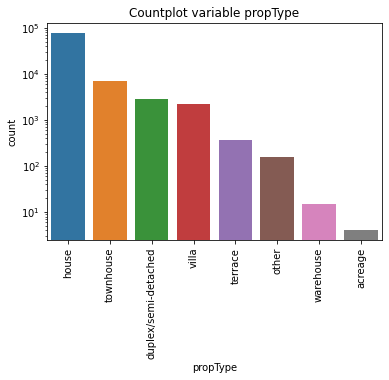

In [12]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='propType', data=df, order=df.propType.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Countplot variable propType")
plt.show()

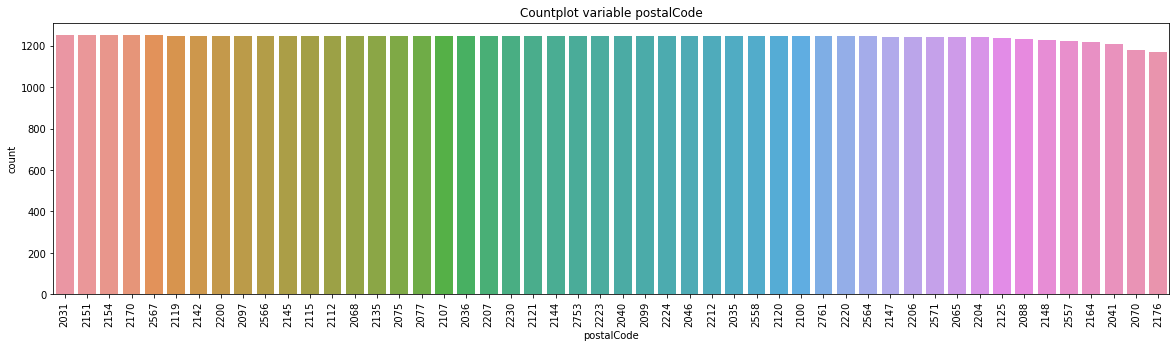

In [13]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x='postalCode', data=df, order=df.postalCode.value_counts()[:50].index)
plt.xticks(rotation=90)
plt.title("Countplot variable postalCode")
plt.show()

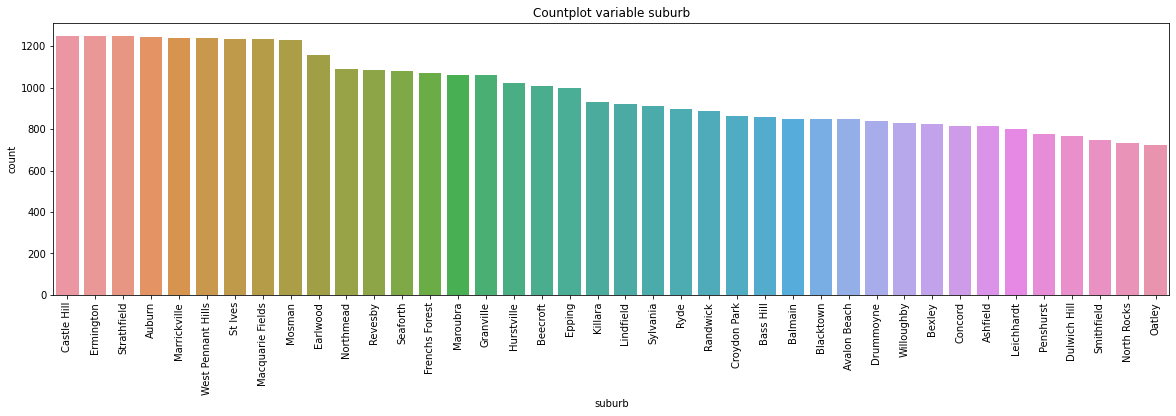

In [14]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x='suburb', data=df, order=df.suburb.value_counts()[:40].index)
plt.xticks(rotation=90)
plt.title("Countplot variable suburb")
plt.show()

## Análisis variables numéricas

### ¿ Cómo se distribuyen ?

#### Sell Price

In [15]:
df.sellPrice.describe()

count    9.086400e+04
mean     1.276411e+06
std      7.331698e+06
min      1.000000e+00
25%      7.225000e+05
50%      1.011000e+06
75%      1.510000e+06
max      2.147484e+09
Name: sellPrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


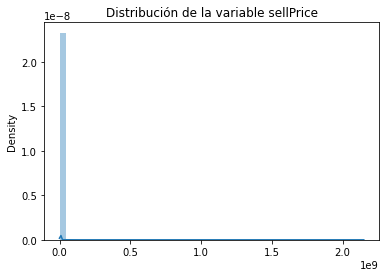

In [16]:
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x=df.sellPrice)
ax.set_title("Distribución de la variable sellPrice")
plt.show()

¿ Por qué se ve tan feo este gráfico ?

Tenemos valores extemos! Lo podemos ver en un boxplot

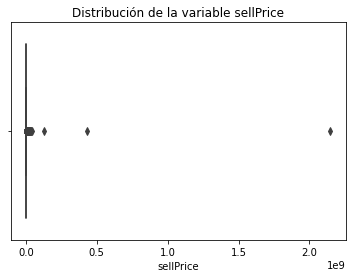

In [17]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.sellPrice)
ax.set_title("Distribución de la variable sellPrice")
plt.show()

En este caso, vamos a descartar estos valores extremos para seguir con nuestro análisis sobre los casos más "normales".

Para esto, vamos a utilizar el IQR.

EJERCICIO: Filtrar outliers utilizando el IQR.

In [18]:
#COMPLETAR

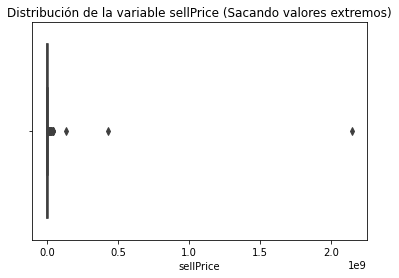

In [19]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.sellPrice)
ax.set_title("Distribución de la variable sellPrice (Sacando valores extremos)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


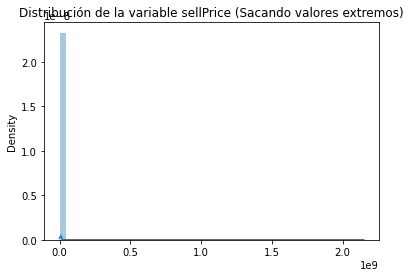

In [20]:
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x=df.sellPrice)
ax.set_title("Distribución de la variable sellPrice (Sacando valores extremos)")
plt.show()

#### Bed

In [21]:
df.bed.describe()

count    90804.000000
mean         3.531012
std          1.039498
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         36.000000
Name: bed, dtype: float64

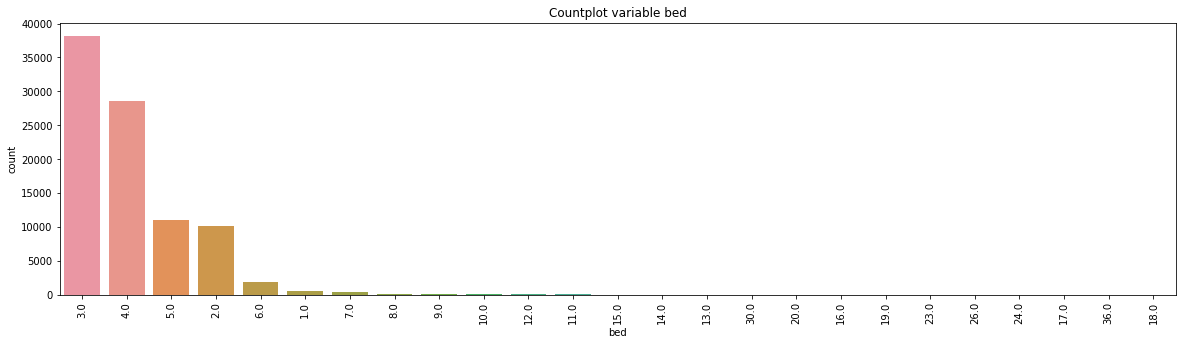

In [22]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x='bed', data=df, order=df.bed.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable bed")
plt.show()

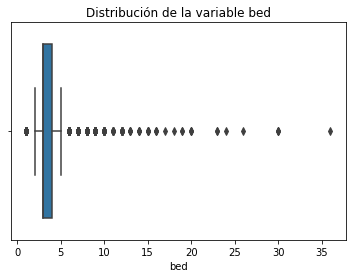

In [23]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.bed)
ax.set_title("Distribución de la variable bed")
plt.show()

Vemos que la variable bed también tiene muchos valores extremos. La limpiamos para poder visualizar mejor.

Para limpiarla, también vamos a utilizar el IQR.

EJERCICIO: Para no repetir código, hacer una función que reciba un df y el nombre de la columna a limpiar. Esta función debe retornar el df sin outliers en la columna especificada.

In [24]:
#COMPLETAR

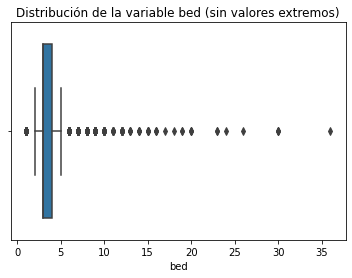

In [25]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.bed)
ax.set_title("Distribución de la variable bed (sin valores extremos)")
plt.show()

#### Bath

In [26]:
df.bath.describe()

count    90863.000000
mean         1.899651
std          0.967825
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         99.000000
Name: bath, dtype: float64

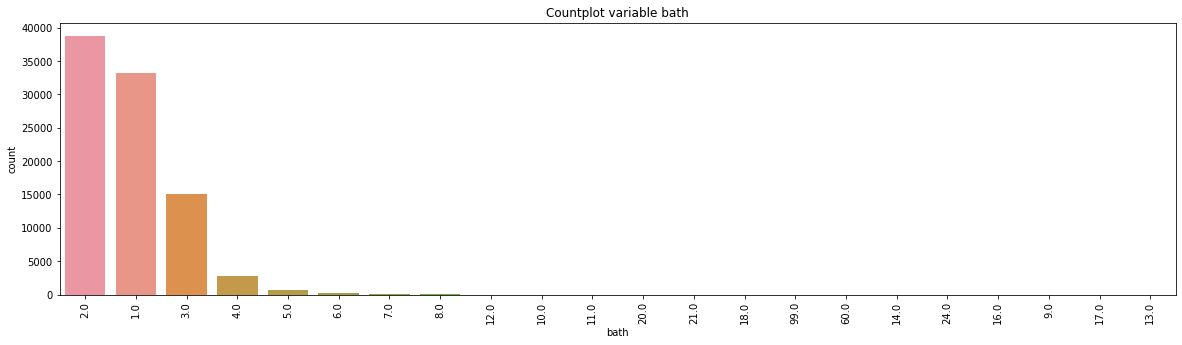

In [27]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x='bath', data=df, order=df.bath.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable bath")
plt.show()

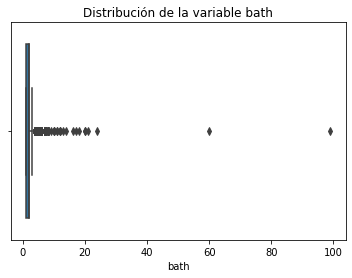

In [28]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.bath)
ax.set_title("Distribución de la variable bath")
plt.show()

Vemos en el gráfico que a partir de 4 los valores son considerados extremos. Tomemos solo las casas que tienen hasta 4 baños:

In [29]:
df = df[df.bath <=4]

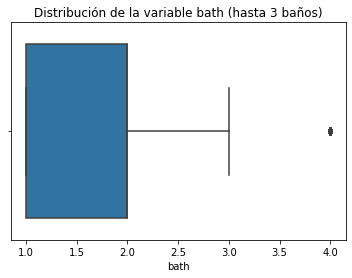

In [30]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.bath)
ax.set_title("Distribución de la variable bath (hasta 3 baños)")
plt.show()

#### Car

In [31]:
df.car.describe()

count    82379.000000
mean         1.931621
std          1.012317
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         30.000000
Name: car, dtype: float64

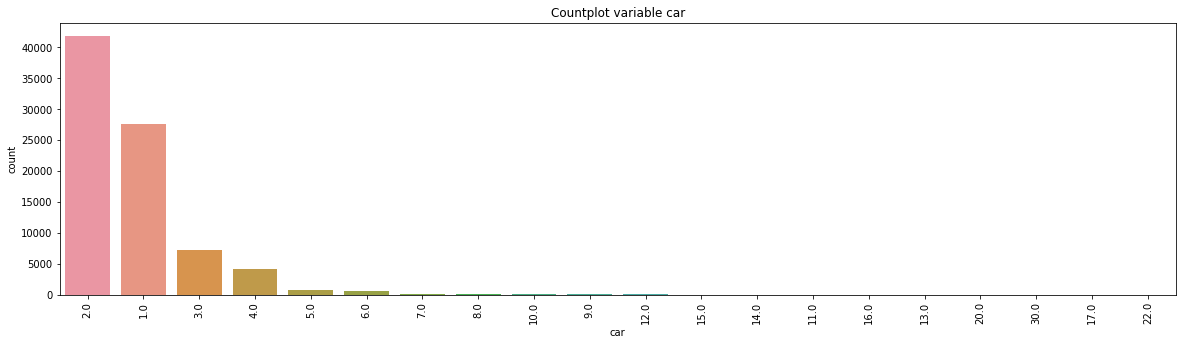

In [32]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x='car', data=df, order=df.car.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable car")
plt.show()

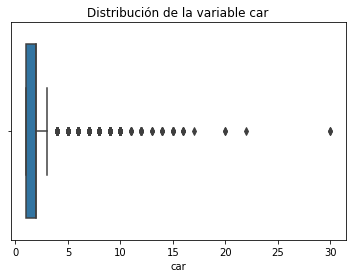

In [33]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.car)
ax.set_title("Distribución de la variable car")
plt.show()

Lo mismo con autos, vemos que a partir de 4 hay muy pocos casos. Vamos a tomar solo hasta 4 autos

In [34]:
df = df[df.car <=4]

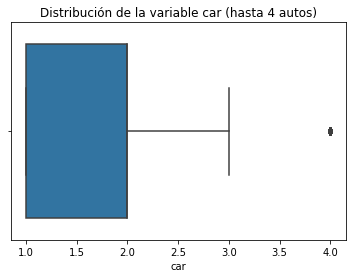

In [35]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.car)
ax.set_title("Distribución de la variable car (hasta 4 autos)")
plt.show()

## Relación entre variables

Ahora queremos ver, como estas distintas variables afectan el precio de las casas.

Para arrancar, podemos graficar un heatmap con correlaciones:

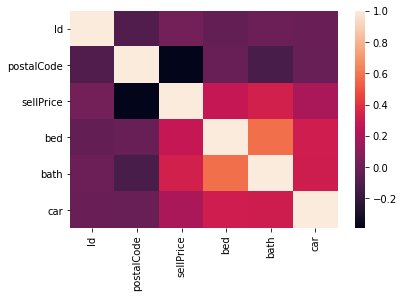

In [36]:
sns.heatmap(df.corr(method='kendall'))
plt.show()

No está muy claro, no? 

Hagamos algunos retoques.

Primero, sacamos la variabli Id que no vamos a utilizar:

Además, vemos que en el heatmap aparece la variable postalCode. Esto no tiene sentido, ya que la variable postalCode es categórica.



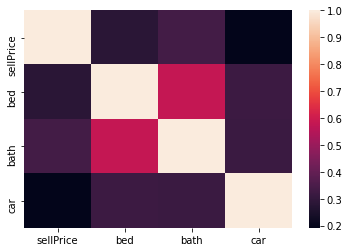

In [37]:
df_corr = df[['sellPrice', 'bed', 'bath', 'car']].copy()

sns.heatmap(df_corr.corr(method='kendall'))
plt.show()

¿ Mejor ?

Igual, vemos que de la diagonal para arriba, el grafico se duplica. Eliminemos la mitad superior y utilicemos una paleta de colores que sea más simple de visualizar.

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

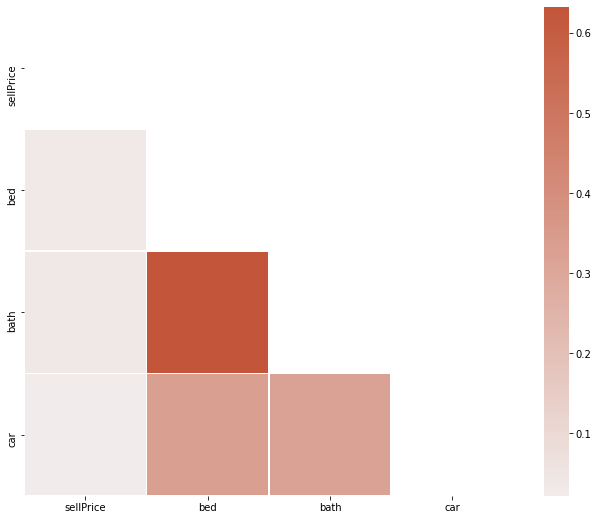

In [38]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

In [ ]:
df_corr.corr()

,sellPrice,bed,bath,car
sellPrice,1.000000,0.266241,0.306897,0.177592
bed,0.266241,1.000000,0.559178,0.307911
bath,0.306897,0.559178,1.000000,0.293708
car,0.177592,0.307911,0.293708,1.000000


Vemos que el par de variables con correlación más alta es: bath - bed.

Ahora, veamos como sube o baja el precio en relación a la cantidad de autos, camas y baños:

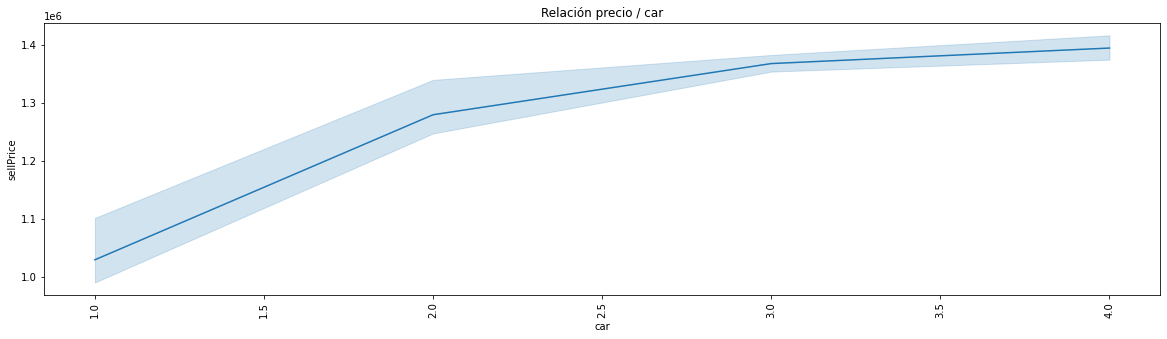

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x='car', y='sellPrice', data=df)
plt.xticks(rotation=90)
plt.title("Relación precio / car")
plt.show()

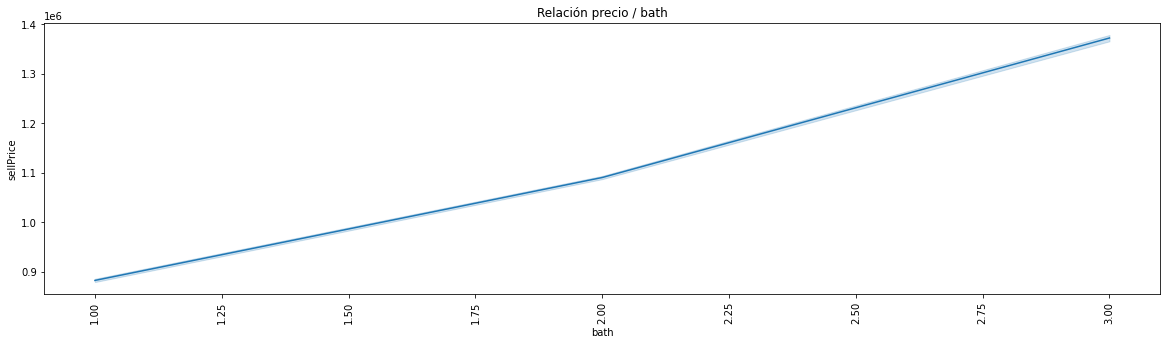

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x='bath', y='sellPrice', data=df)
plt.xticks(rotation=90)
plt.title("Relación precio / bath")
plt.show()

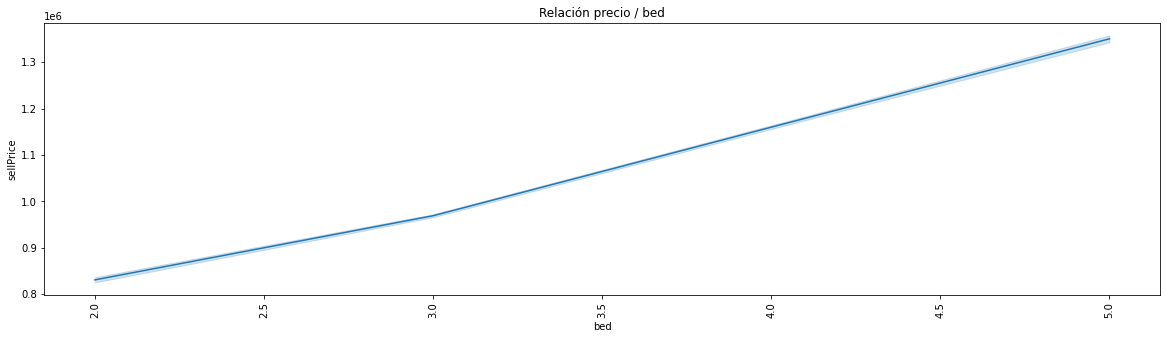

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.lineplot(x='bed', y='sellPrice', data=df)
plt.xticks(rotation=90)
plt.title("Relación precio / bed")
plt.show()

In [ ]:
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
5,2019-05-10,6,Bilgola Plateau,2107,1610000,4.0,2,2.0,house
6,2019-04-13,7,Avalon Beach,2107,1510000,3.0,1,2.0,house


# Ejercicio

Responder las siguientes preguntas (utilizando df como quedó, sin los valores extremos) y graficar cuando corresponda:

1- ¿ En qué suburb se encuentra la casa (house) más cara ?

2- ¿ Cuántos baños tiene la casa (house) más barata ?

3- Calcular el sellPrice medio para cada propType

4- ¿ Cuántas "townhouse" hay en el postalCode 2107 ?

5 - ¿ Cuál es el suburb con el sellPrice medio más alto ?

6 - Escribir una función que reciba una lista de propType y:
  - Primero valide que el propType sea válido (exista en el dataset, sea tipo sting y lo que consideren relevante validar), si no es válido, imprimir un error explicativo (pueden investigar "Raise exception" en python) y finalizar.
  - Por cada elemento válido de la lista, hacer un plot de la distribución de el sellPrice de ese tipo de propiedad.